In [1]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc

In [2]:
diabetes_data=pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0, 0.5, 'Age')

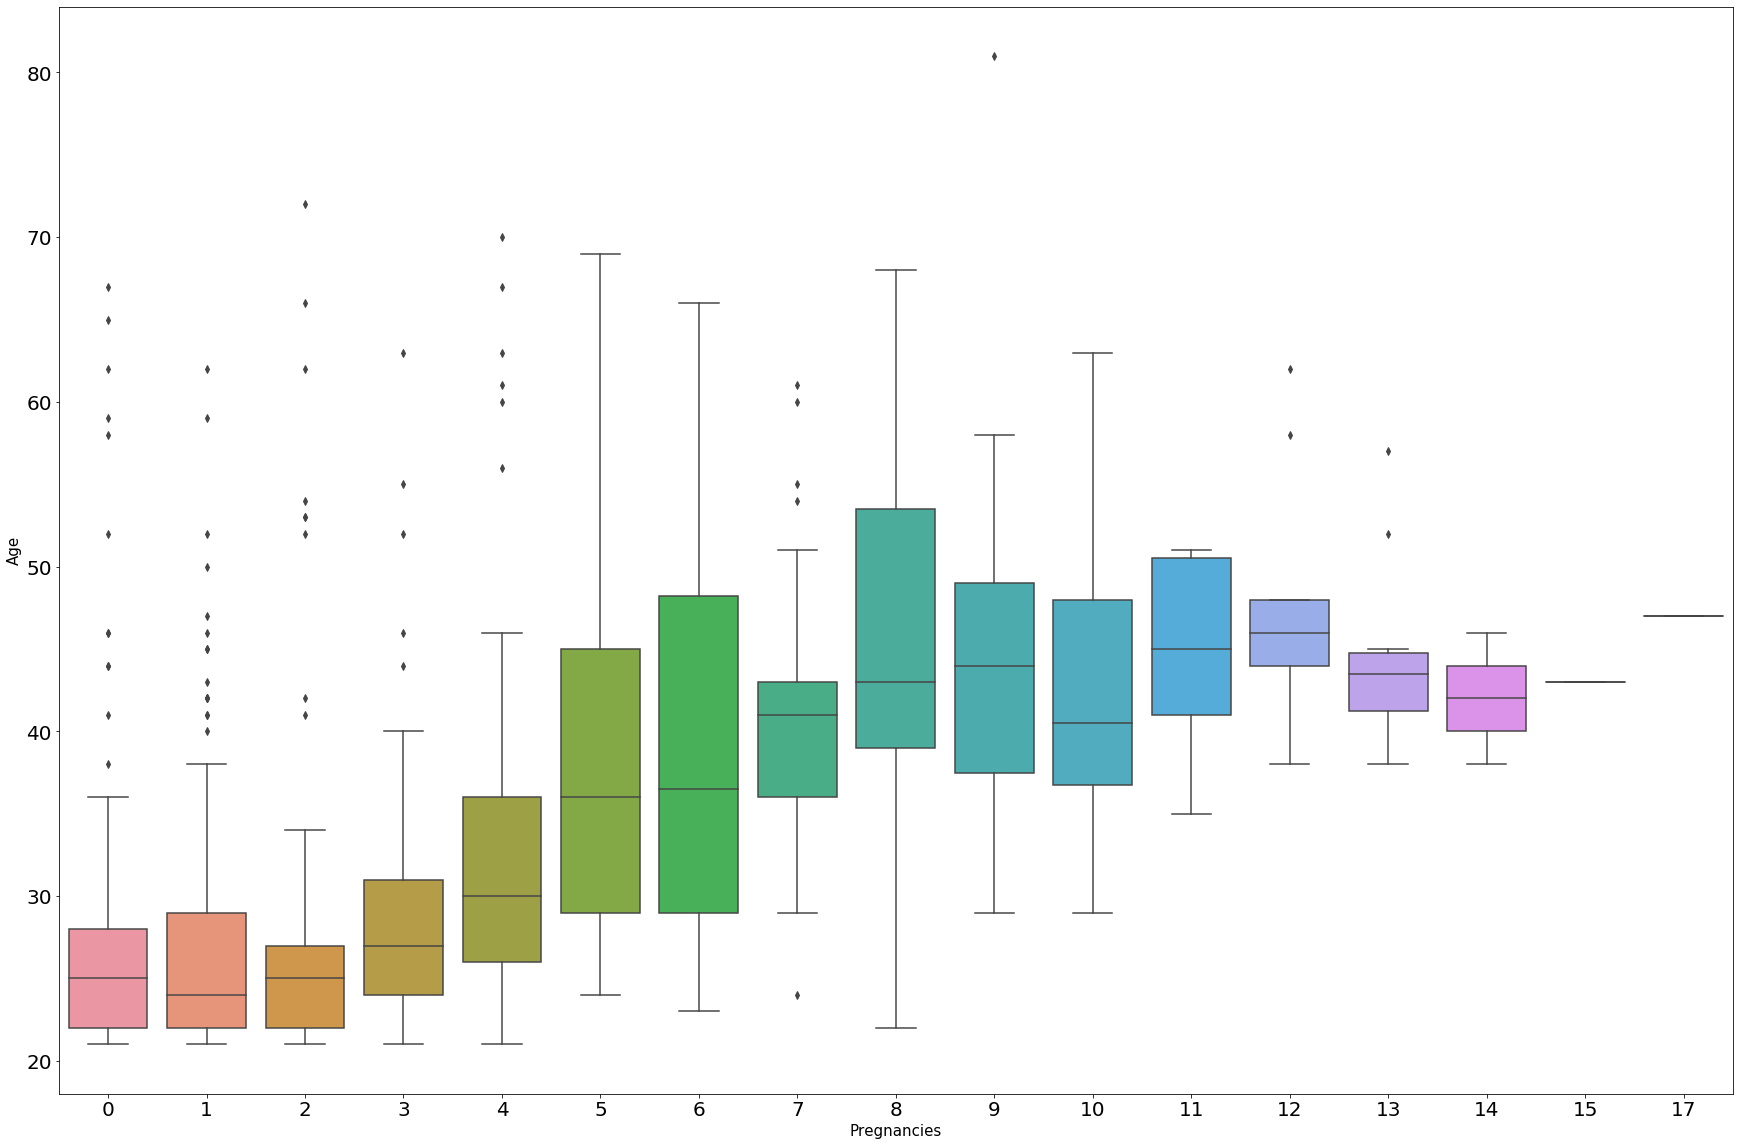

In [7]:
plt.figure(figsize=(30,20))
sns.boxplot(x=diabetes_data['Pregnancies'],y=diabetes_data['Age'])
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Pregnancies',size=15)
plt.ylabel('Age',size=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29147310>,
      dtype=object)

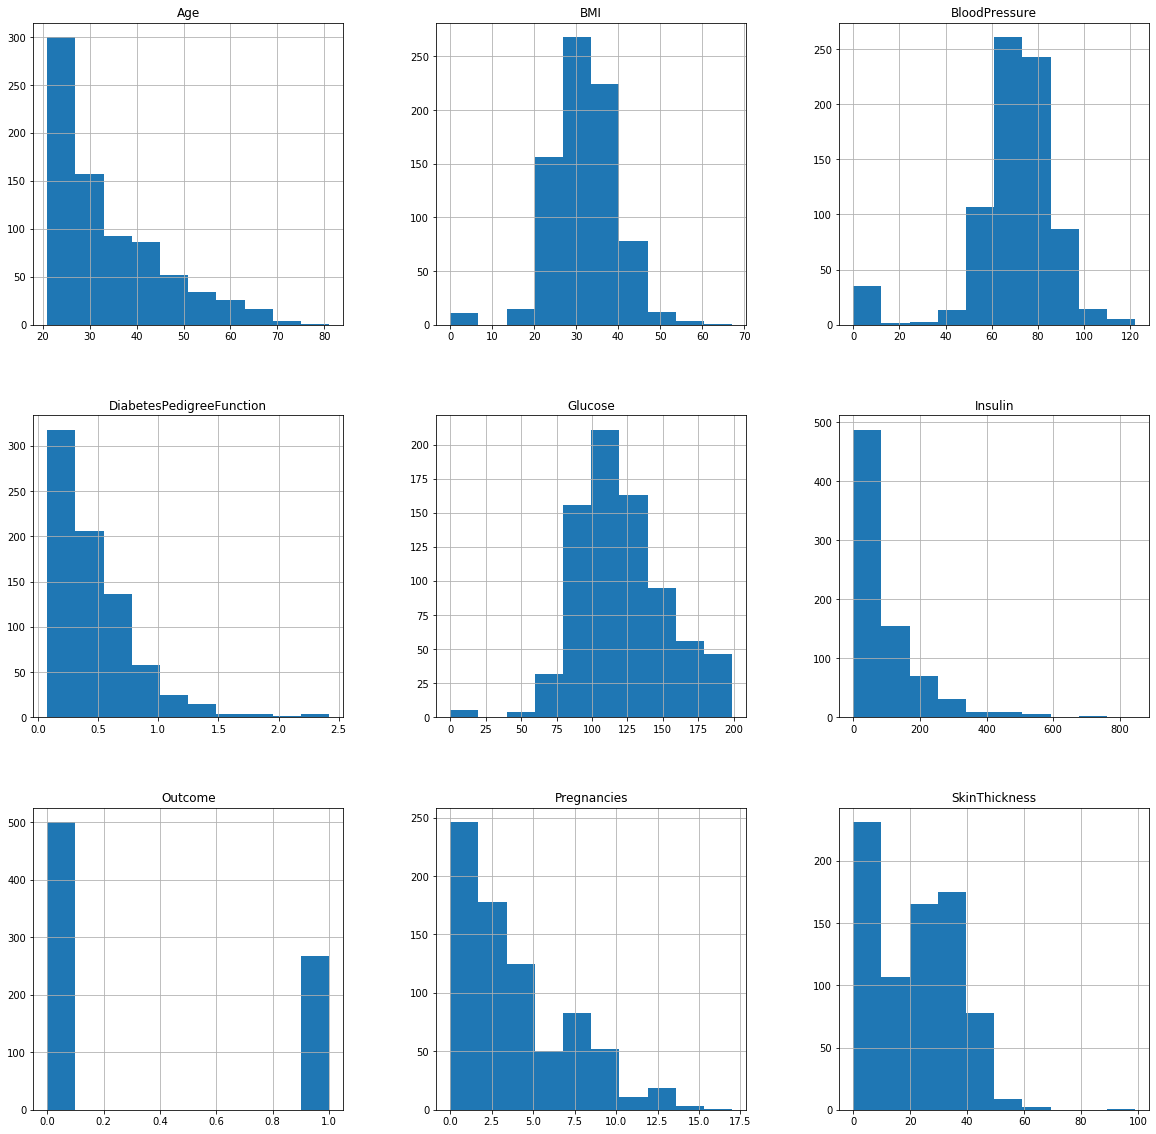

In [8]:
diabetes_data.hist(figsize=(20,20))

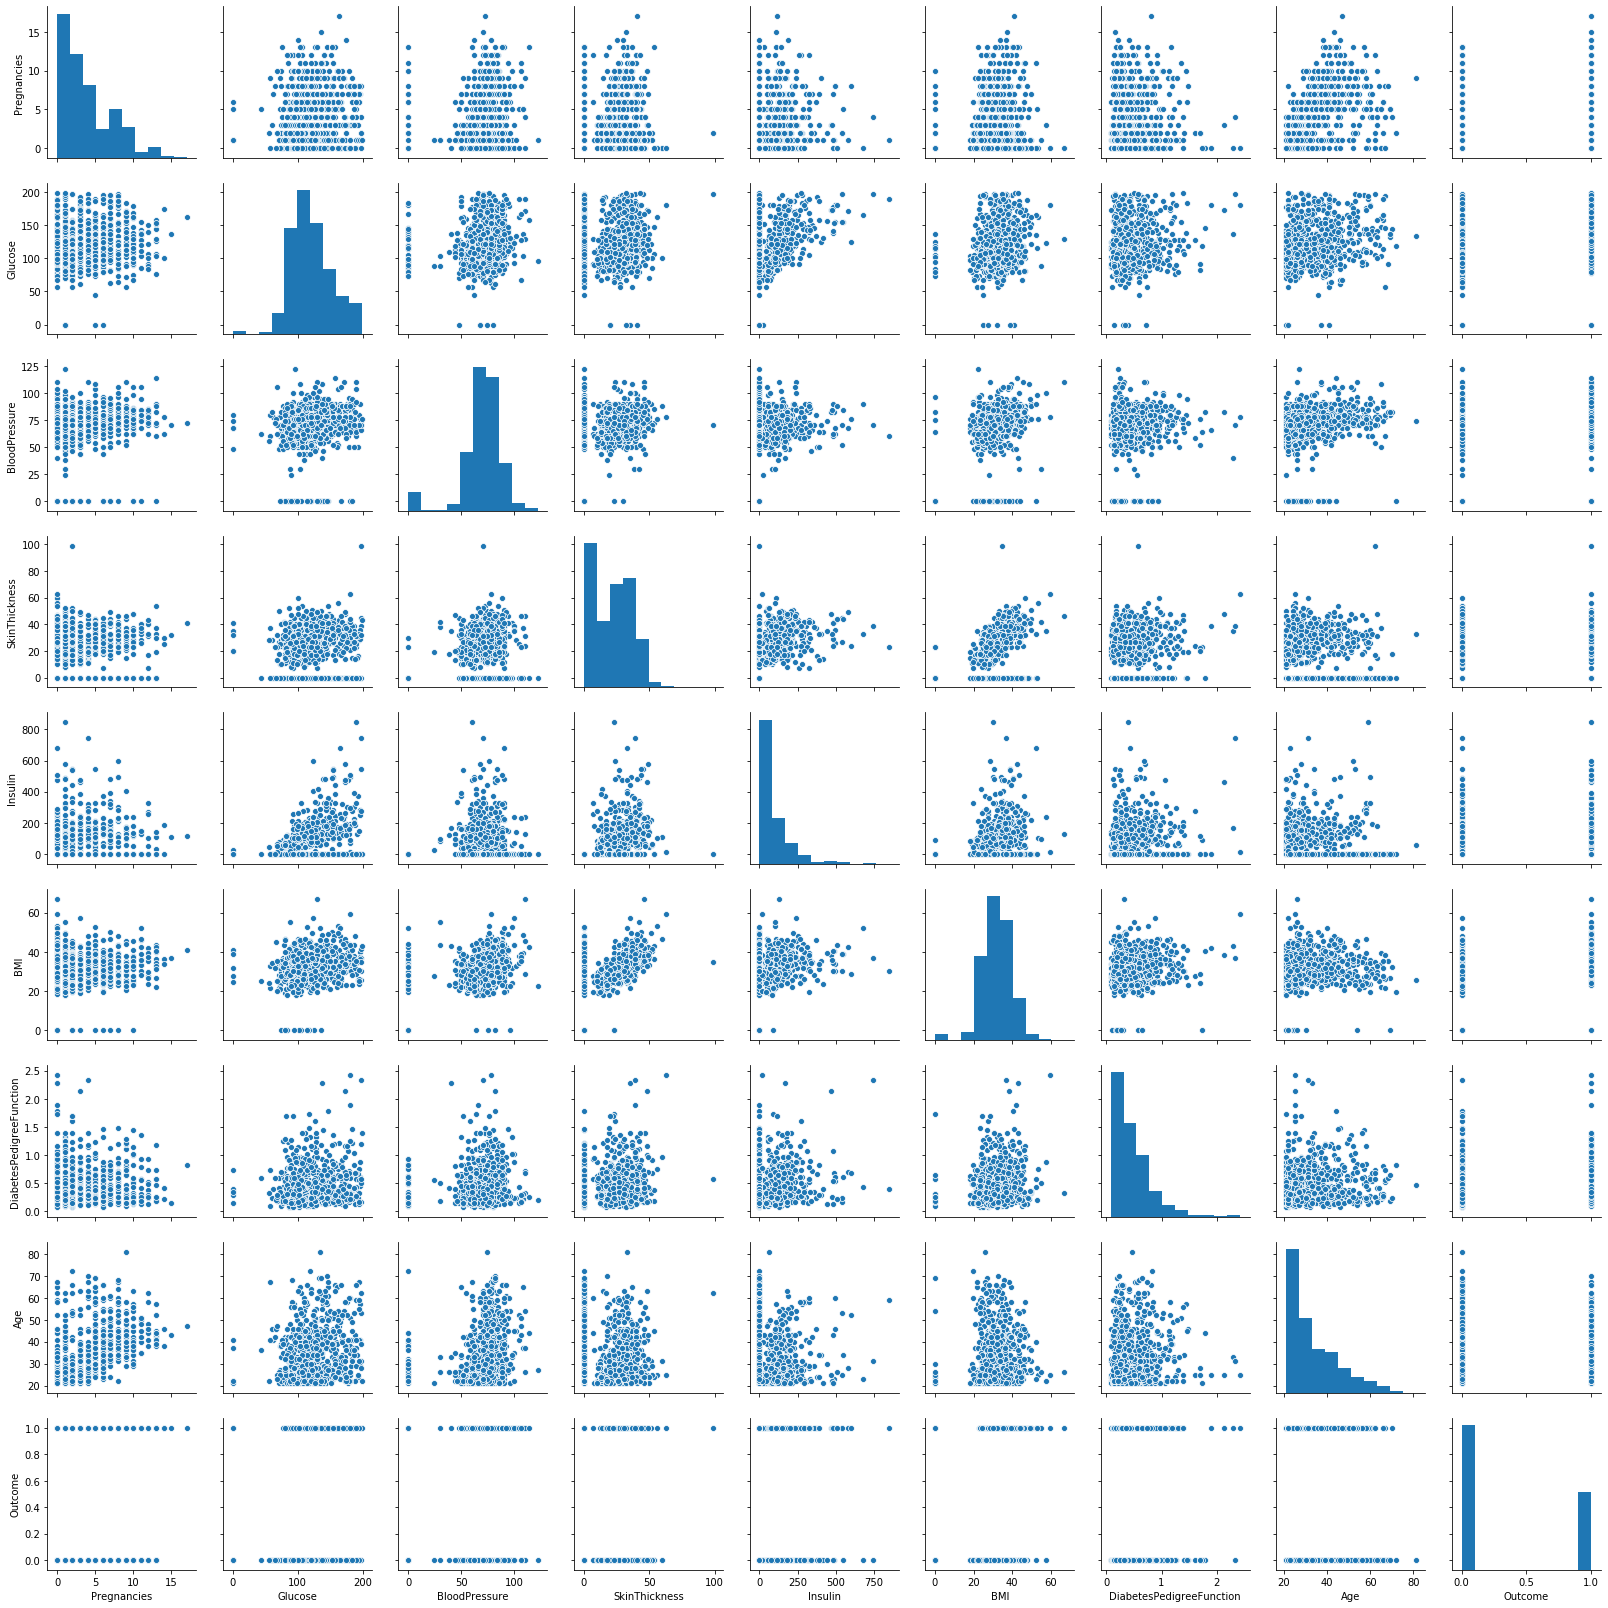

In [9]:
sns.pairplot(diabetes_data)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

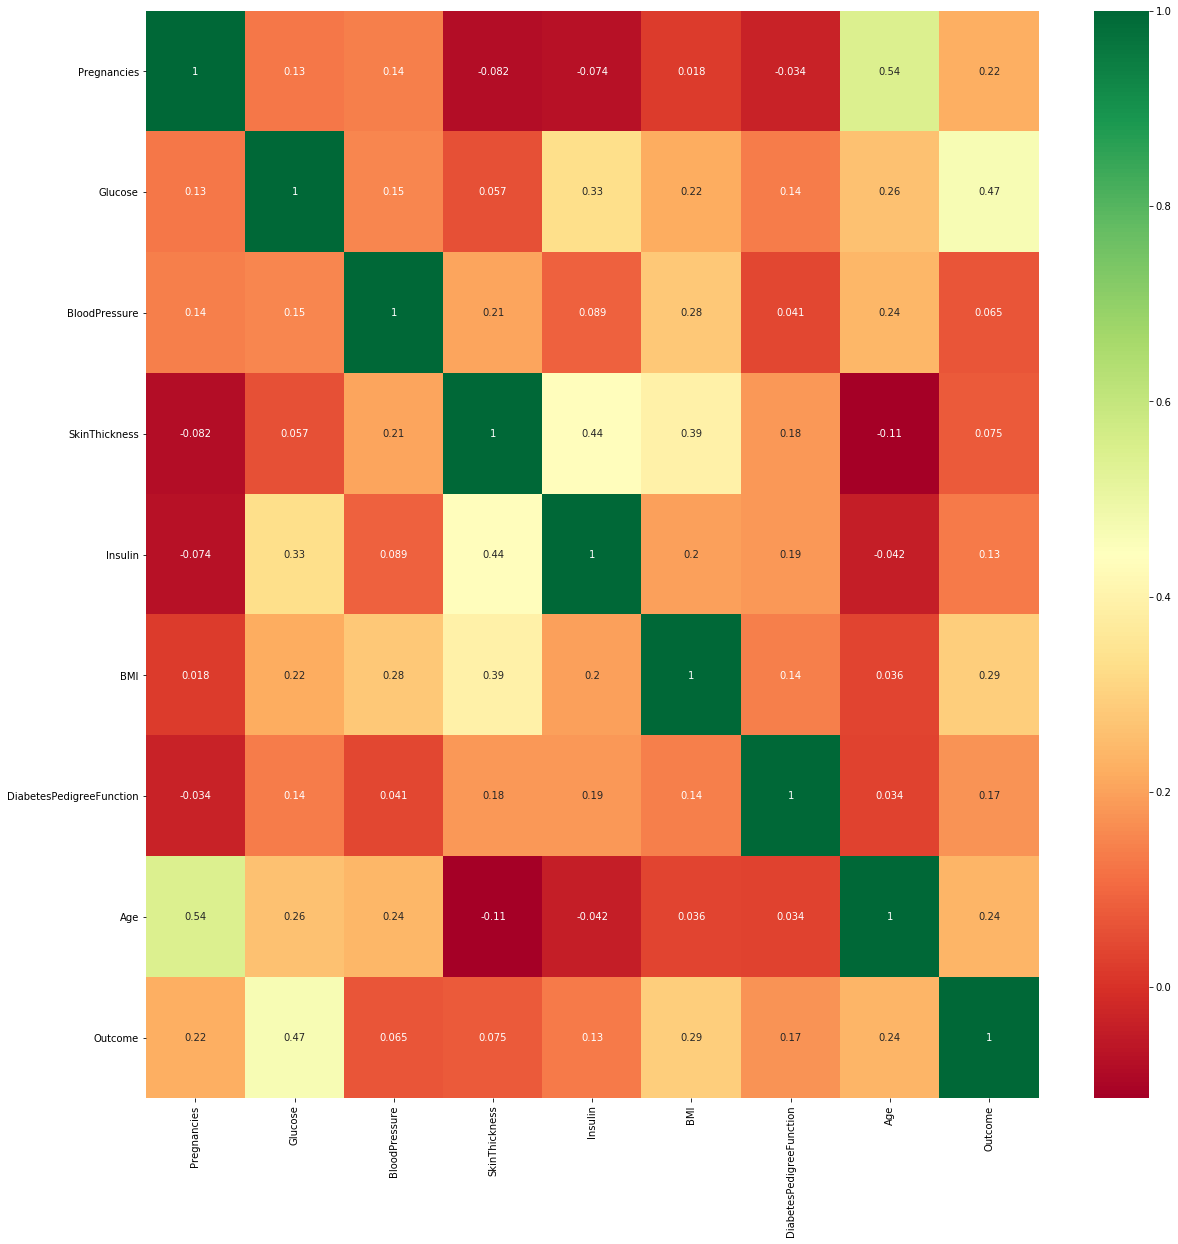

In [10]:
plt.figure(figsize=(20,20))
corr=diabetes_data.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]]
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
x_scaled=scaler.transform(x)

In [13]:
df=pd.DataFrame(x_scaled,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [14]:
df['Outcome']=diabetes_data['Outcome']

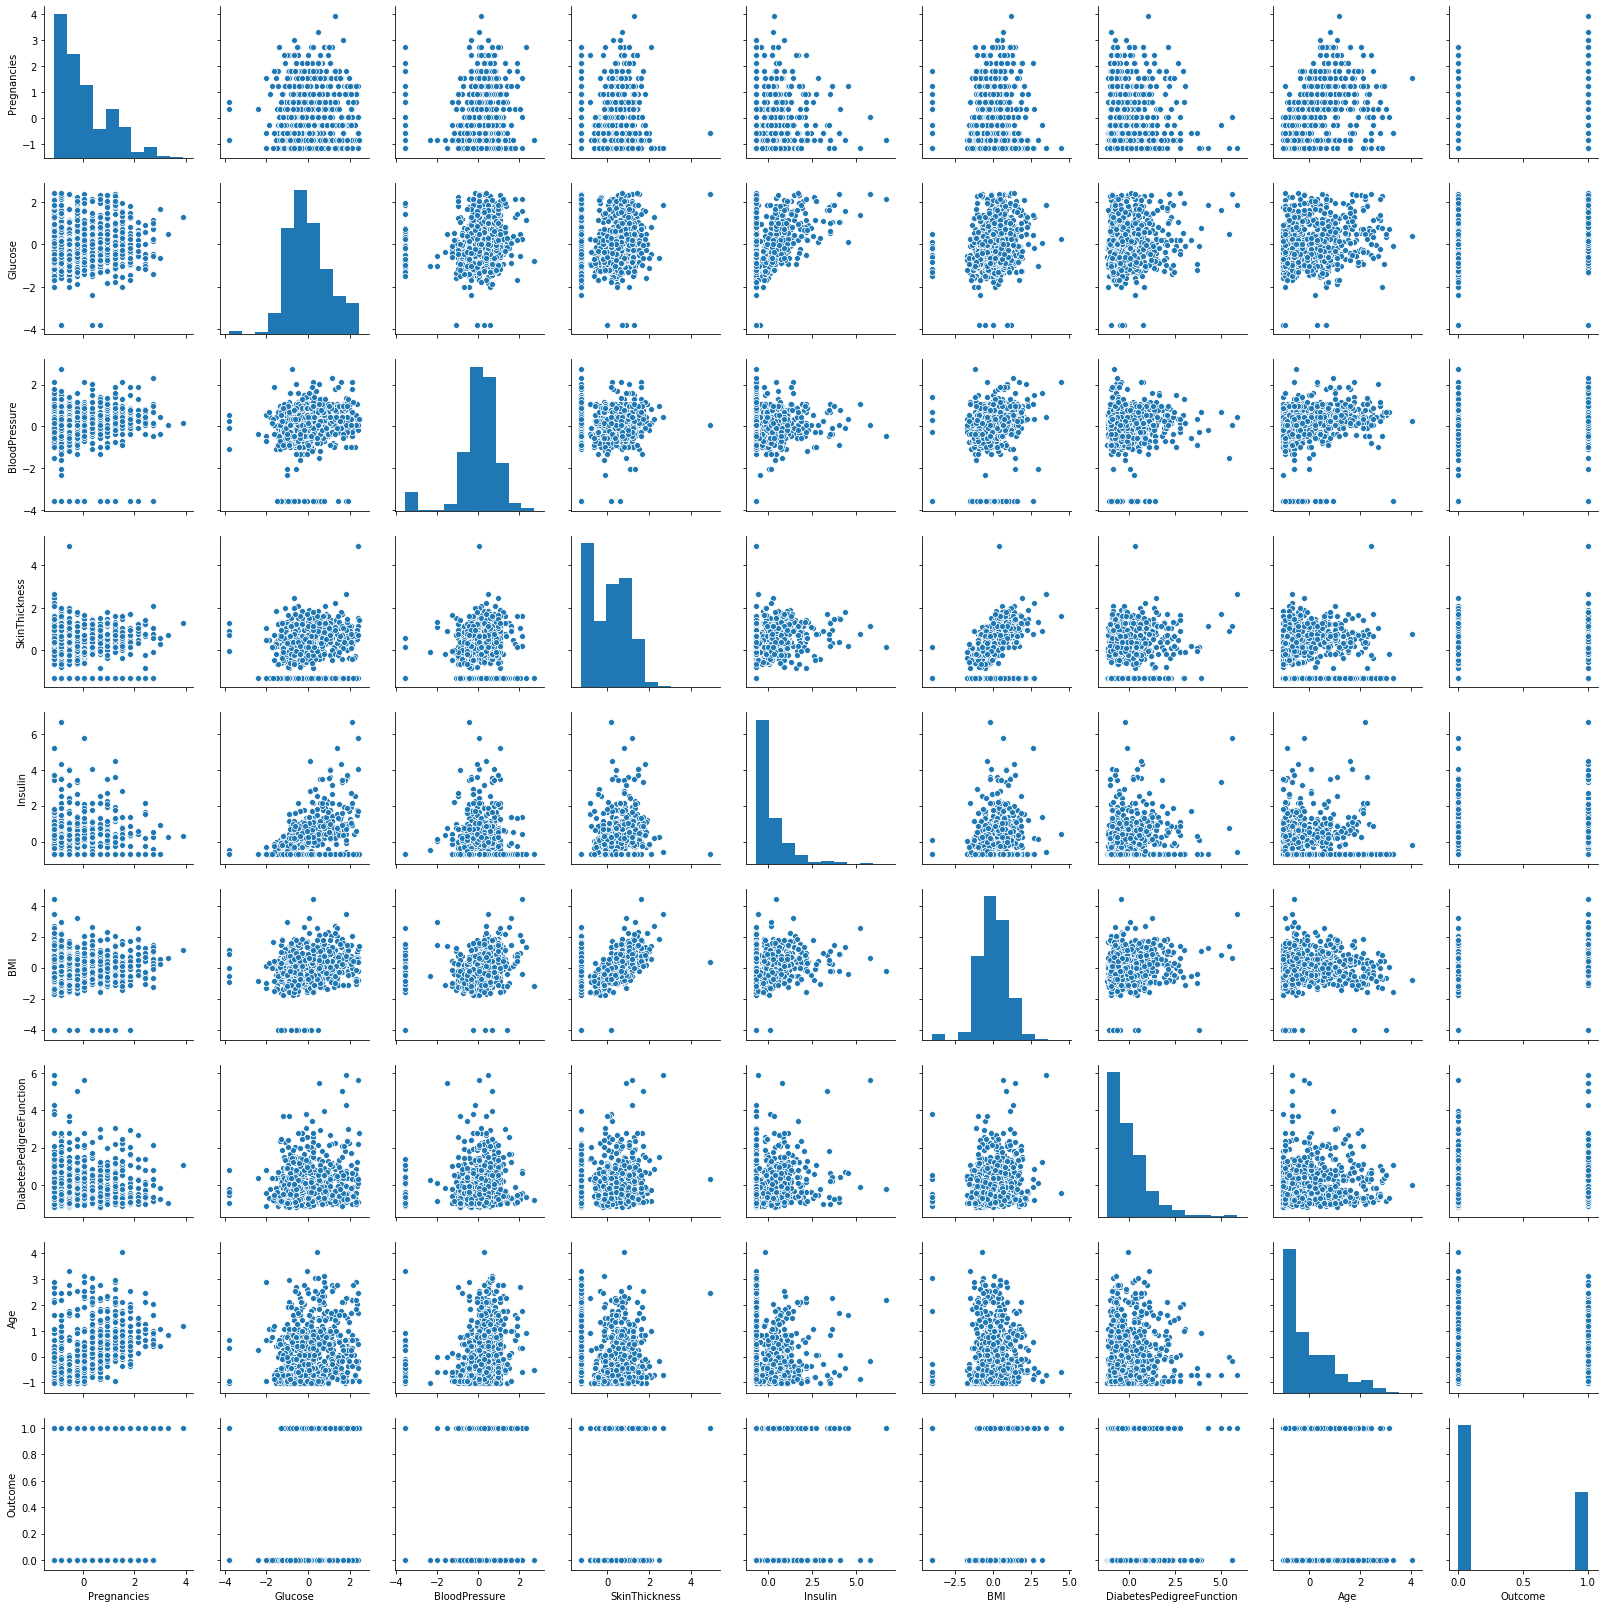

In [15]:
sns.pairplot(df)
X=df.copy()
y=diabetes_data.copy()

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



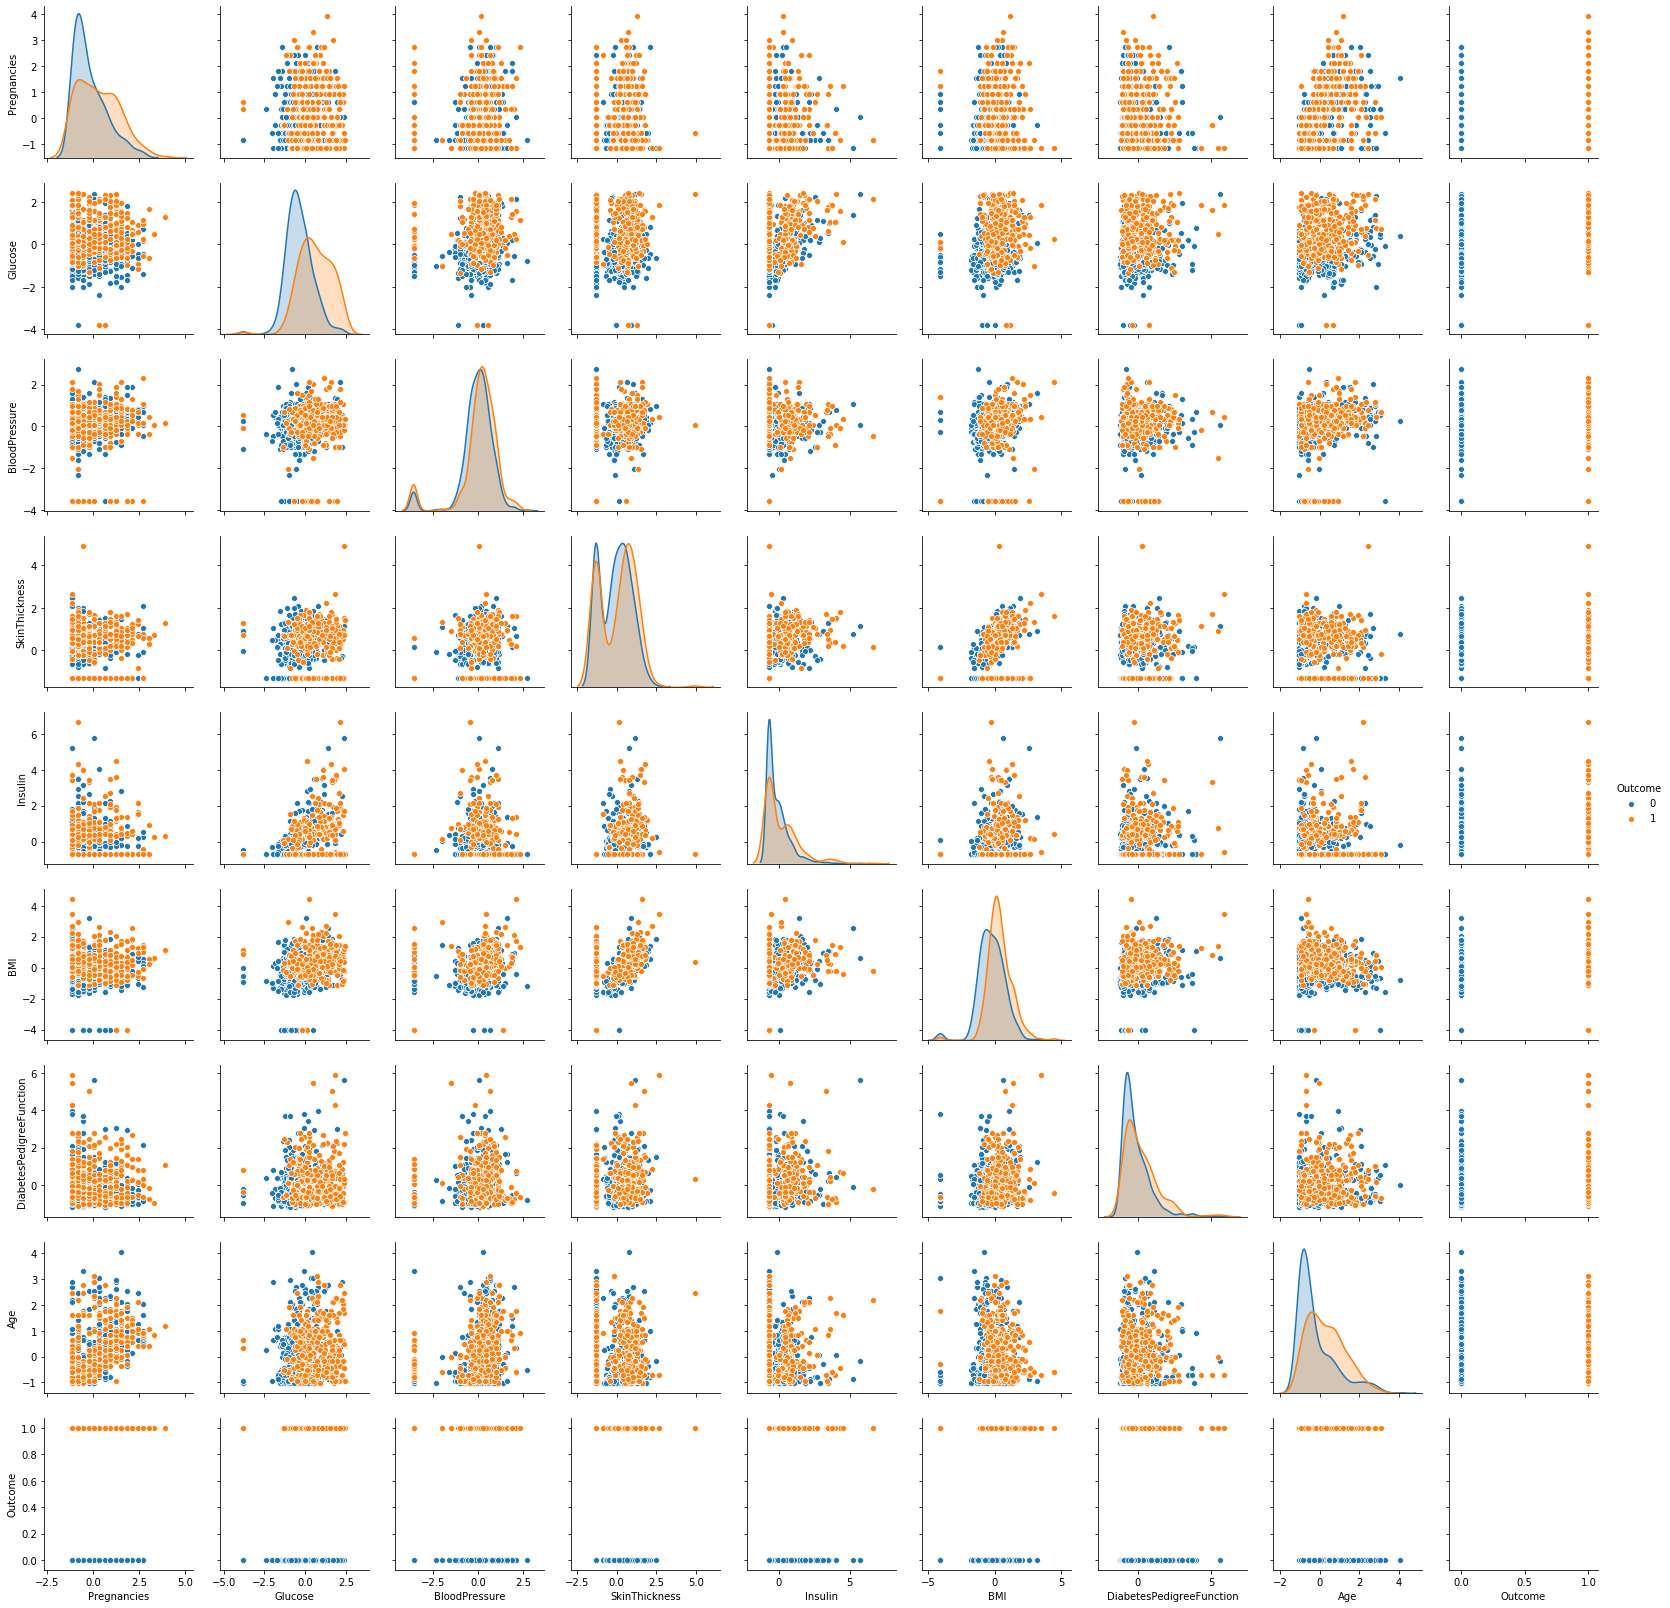

In [16]:
sns.pairplot(df,hue='Outcome')

In [17]:
y=diabetes_data.Outcome

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
test_scores=[]
train_scores=[]
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


    

In [19]:
for ind in range(0,14):
    if test_scores[ind]==max(test_scores):
        j=ind+1
        ind+=1
    else:
        ind+=1
print(j)


5


In [20]:
print('Max test score is {} at'.format(max(test_scores).round(2)*100))
print('K={}'.format(j))

Max test score is 93.0 at
K=5


In [21]:
score_df=pd.DataFrame(test_scores)
score_df=score_df.rename(columns={0:'Test Score'})


In [22]:
score_df['Train Score']=train_scores
score_df['K']=np.arange(1,15)

In [23]:
score_df

,Test Score,Train Score,K
0,0.913420,1.000000,1
1,0.861472,0.949721,2
2,0.900433,0.964618,3
3,0.887446,0.947858,4
4,0.926407,0.951583,5
5,0.896104,0.942272,6
6,0.896104,0.947858,7
7,0.896104,0.927374,8
8,0.904762,0.929236,9
9,0.896104,0.927374,10


The test scores will always be lower than train scores. This is evident from the dataframe above

Text(0, 0.5, 'Score')

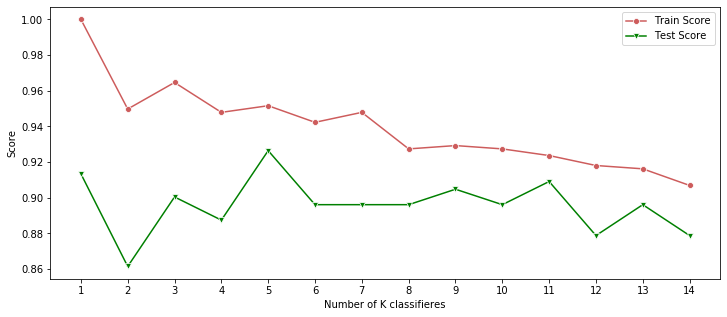

In [24]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,15),train_scores,marker='o',color='indianred',label='Train Score')
p=sns.lineplot(range(1,15),test_scores,marker='v',color='green',label='Test Score')
plt.xticks(np.arange(1,15))
plt.xlabel('Number of K classifieres')
plt.ylabel('Score')

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[145,   5],
       [ 23,  58]])

In [27]:
pd.crosstab(y_test,y_pred,rownames=['True outcome'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True outcome,,,
0,145,5,150
1,23,58,81
All,168,63,231


Text(66.5, 0.5, 'Actual outcomes')

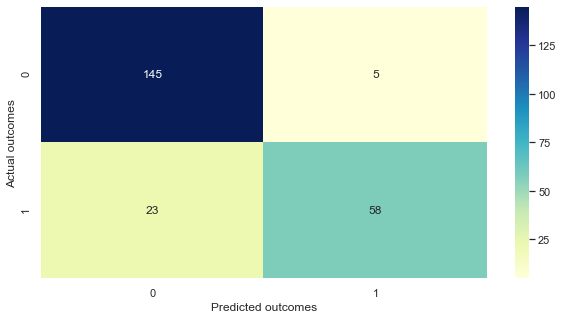

In [30]:
f,ax=plt.subplots(figsize=(10,5))
sns.set()
from sklearn import metrics

cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='d',cmap='YlGnBu',ax=ax)
plt.xlabel('Predicted outcomes')
plt.ylabel('Actual outcomes')